# Splitting test and training data
When you train a data model you may need to split up your data into test and training data sets

To accomplish this task we will use the [scikit-learn](https://scikit-learn.org/stable/) library

scikit-learn is an open source, BSD licensed library for data science for preprocessing and training models.

Before we can split our data test and training data, we need to do some data preparation

In [28]:
import pandas as pd

Let's load our csv file with information about flights and flight delays

Use **shape** to find out how many rows and columns are in the original DataFrame

In [29]:
delays_df = pd.read_csv('data/Lots_of_flight_data.csv')
delays_df.shape
delays_df

,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,2018-10-01,WN,N221WN,802,ABQ,BWI,905,903.0,-2.0,1450,1433.0,-17.0,225,210.0,197.0,1670
1,2018-10-01,WN,N8329B,3744,ABQ,BWI,1500,1458.0,-2.0,2045,2020.0,-25.0,225,202.0,191.0,1670
2,2018-10-01,WN,N920WN,1019,ABQ,DAL,1800,1802.0,2.0,2045,2032.0,-13.0,105,90.0,80.0,580
3,2018-10-01,WN,N480WN,1499,ABQ,DAL,950,947.0,-3.0,1235,1223.0,-12.0,105,96.0,81.0,580
4,2018-10-01,WN,N227WN,3635,ABQ,DAL,1150,1151.0,1.0,1430,1423.0,-7.0,100,92.0,80.0,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2018-10-15,OH,N582NN,5248,CLT,TLH,1610,1607.0,-3.0,1737,1730.0,-7.0,87,83.0,61.0,386
299996,2018-10-15,OH,N582NN,5248,TLH,CLT,1808,1804.0,-4.0,1940,1927.0,-13.0,92,83.0,65.0,386
299997,2018-10-15,OH,N706PS,5250,CLT,CRW,750,745.0,-5.0,901,859.0,-2.0,71,74.0,41.0,221
299998,2018-10-15,OH,N706PS,5250,CRW,CLT,931,926.0,-5.0,1052,1039.0,-13.0,81,73.0,44.0,221


## Split data into features and labels
Create a DataFrame called X containing only the features we want to use to train our model.

**Note** You can only use numeric values as features, if you have non-numeric values you must apply different techniques such as Hot Encoding to convert these into numeric values before using them as features to train a model. Check out Data Science courses for more information on these techniques!

In [30]:
X = delays_df.loc[:,['DISTANCE', 'CRS_ELAPSED_TIME']]
print(X.head())
print(X.shape)

   DISTANCE  CRS_ELAPSED_TIME
0      1670               225
1      1670               225
2       580               105
3       580               105
4       580               100
(300000, 2)


Create a DataFrame called y containing only the value we want to predict with our model. 

In our case we want to predict how many minutes late a flight will arrive. This information is in the ARR_DELAY column. 

In [31]:
y = delays_df.loc[:,['ARR_DELAY']] #what we want to predict
print(y.head())
print(y.shape)

   ARR_DELAY
0      -17.0
1      -25.0
2      -13.0
3      -12.0
4       -7.0
(300000, 1)


## Split into test and training data
Use **scikitlearn train_test_split** to move 30% of the rows into Test DataFrames

The other 70% of the rows into DataFrames we can use to train our model

NOTE: by specifying a value for *random_state* we ensure that if we run the code again the same rows will be moved into the test DataFrame. This makes our results repeatable.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #con kernel base python 3.7.7

We now have a DataFrame **X_train** which contains 70% of the rows

We will use this DataFrame to train our model

In [33]:
X_train.shape

(210000, 2)

The DataFrame **X_test** contains the remaining 30% of the rows

We will use this DataFrame to test our trained model, so we can check it's accuracy

In [34]:
X_test.shape

(90000, 2)

**X_train** and **X_test** contain our features

The features are the columns we think can help us predict how late a flight will arrive: **DISTANCE** and **CRS_ELAPSED_TIME**

In [35]:
X_train.head()

,DISTANCE,CRS_ELAPSED_TIME
186295,237,60
127847,411,111
274740,342,85
74908,1005,164
11630,484,100


The DataFrame **y_train**  contains 70% of the rows

We will use this DataFrame to train our model

If you don't need to keep the original DataFrame, you can just delete the rows within the existing DataFrame instead of creating a new one
**inplace=*True*** indicates you want to drop the rows in the specified DataFrame

In [36]:
y_train.shape

(210000, 1)

The DataFrame **y_test** contains the remaining 30% of the rows

We will use this DataFrame to test our trained model, so we can check it's accuracy

In [37]:
y_test.shape

(90000, 1)

**y_train** and **y_test** contain our label

The label is the columns we want to predict with our trained model: **ARR_DELAY**

**NOTE:**  a negative value for ARR_DELAY indicates a flight arrived early

In [38]:
y_train.head()

,ARR_DELAY
186295,-7.0
127847,-16.0
274740,-10.0
74908,-19.0
11630,-13.0


In [39]:


# Load our data from the csv file
delays_df = pd.read_csv('data/Lots_of_flight_data.csv') 

# Remove rows with null values since those will crash our linear regression model training
delays_df.dropna(inplace=True)

# Move our features into the X DataFrame
X = delays_df.loc[:,[ 'CRS_ELAPSED_TIME']]

# Move our labels into the y DataFrame
y = delays_df.loc[:,['ARR_DELAY']] 

# Split our data into test and training DataFrames
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )



In [40]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()     # Create a scikit learn LinearRegression object
regressor.fit(X_train, y_train)    # Use the fit method to train the model using your training data
#with the train data you create the model, like the function
#then you test the model with the testing data

LinearRegression()

Test the model
Use Scikitlearn LinearRegression predict to have our trained model predict values for our test data
We stored our test data in X_Test
We will store the predicted results in y_pred

In [41]:
y_pred = regressor.predict(X_test)
print(y_pred)

[[3.53674477]
 [5.81192776]
 [4.36408404]
 ...
 [5.88087269]
 [5.97936546]
 [5.63464077]]


In [42]:
y_test

,ARR_DELAY
291483,-5.0
98997,-12.0
23454,-9.0
110802,-14.0
49449,-20.0
...,...
209898,-20.0
22210,-9.0
165727,-6.0
260838,-33.0


In [43]:
#We can compare the values in y_pred to the value in y_test to get a sense of how accurately our mdoel predicted arrival delays
#MSE = mean((actuals - predicteds)^2)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 2250.4614380519715


RMSE = sqrt(MSE)

Skikit learn does not have a function for RMSE, but since it's just the square root of MSE, we can use the numpy library which contains lots of mathematical functions to calculate the square root of the MSE
The lower the RMSE, the better the model.

In [44]:
import numpy as np
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 47.43902863731478


In [45]:
#MAE = mean(abs(actuals - predicteds)).
#MAE is less sensitive to outliers compared to RMSE. Calculate RMSE using mean_absolute_error in the scikit-learn library
print('Mean absolute error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  23.089945513083638


In [46]:
print(type(y_pred))
print(type(y_test))
#y_pred is a numpy array, and y_test is a pandas DataFrame. It has different funcionalities
#head is a method of the DataFrame class it is not a method of numpy arrays


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [47]:
#If you need the functionality of a DataFrame, you can move data from numpy objects to pandas objects and vice-versa.
predicted_df = pd.DataFrame(y_pred)
predicted_df.head()

,0
0,3.536745
1,5.811928
2,4.364084
3,3.467800
4,5.033835


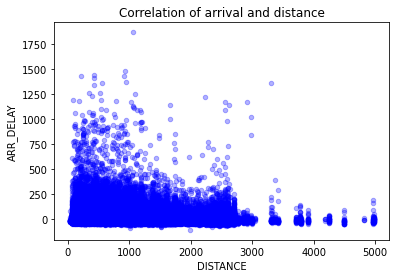

In [48]:
import matplotlib.pyplot as plt

#Check if there is a relationship between the distance of a flight and how late the flight arrives
delays_df.plot(
               kind='scatter',
               x='DISTANCE',
               y='ARR_DELAY',
               color='blue',
               alpha=0.3, #cambia la intensidad del color cuando hay mas puntos en el mismo sitio
               title='Correlation of arrival and distance'
              )
plt.show()

#there is no relation between the distance and the delay of the plane

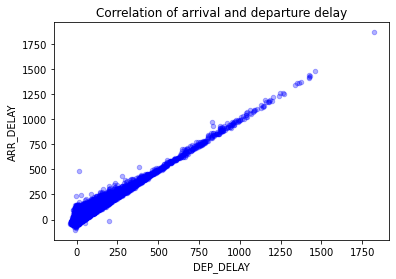

In [49]:


#Check if there is a relationship between the how late the flight leaves and how late the flight arrives
delays_df.plot(
               kind='scatter',
               x='DEP_DELAY',
               y='ARR_DELAY',
               color='blue',
               alpha=0.3,
               title='Correlation of arrival and departure delay'
              )
plt.show()
#there is a relation between the the departure delay and arrival delay 


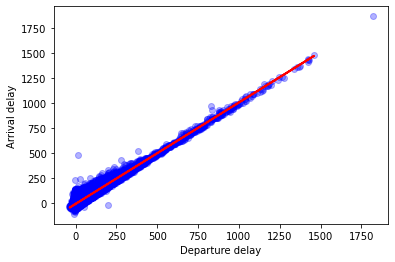

In [65]:

# Load our data from the csv file
delays_df = pd.read_csv('data/Lots_of_flight_data.csv') 

# Remove rows with null values since those will crash our linear regression model training
delays_df.dropna(inplace=True)

# Move our features into the X DataFrame
X = delays_df.loc[:,['DEP_DELAY']]

# Move our labels into the y DataFrame
y = delays_df.loc[:,['ARR_DELAY']] 

# Split our data into test and training DataFrames
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )



regressor = LinearRegression()     # Create a scikit learn LinearRegression object
regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_test)

plt.xlabel('Departure delay')
plt.ylabel('Arrival delay')
#Check if there is a relationship between the how late the flight leaves and how late the flight arrives
plt.plot(
               X_test,
               y_pred,
               color='red',
               linewidth=2
              )
plt.scatter(
               x=delays_df['DEP_DELAY'],
               y=delays_df['ARR_DELAY'],
               color='blue',
               alpha=0.3,
              )
plt.show()
#there is a relation between the the departure delay and arrival delay 